In [16]:
#!pip freeze > ../requirements.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('seaborn')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
from wordcloud import WordCloud
from lexicalrichness import LexicalRichness

In [2]:
"""
Lexicon source is (C) 2016 National Research Council Canada (NRC) 
and library is for research purposes only.  
Source: http://sentiment.nrc.ca/lex                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             icons-for-research/
"""
lexicon = pd.read_csv('./data/pt-nrc-lexicon.csv', sep=';', encoding='utf-8')

In [2]:
df = pd.read_csv('./data/clean_lyrics.csv')
df.head()

,id,title,artist,composer,album,year,lyric,decade,clean_lyric,unique_words,words
0,2360,João Teimoso,Marília Batista,Noel Rosa / Marilia Batista.,Poeta da Vila,1953,Tenho mais o que fazer Não discuto com teimoso...,50,discuto teimoso perder precioso viver joão tei...,"{'precioso', 'comida', 'discuto', 'nome', 'fog...","['discuto', 'teimoso', 'perder', 'precioso', '..."
1,2361,Morena Sereia,Marília Batista,José Maria De Abreu 1936 / Noel Rosa.,Poeta da Vila,1953,Morena sereia Que à beira-mar não passeia Que ...,50,morena sereia beiramar passeia senta praia dei...,"{'senta', 'escrevi', 'esperança', 'enche', 'no...","['morena', 'sereia', 'beiramar', 'passeia', 's..."
2,2362,"Parabéns, Guanabara",Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,"Rio, querida Guanabara Eu sou gente também Ace...",50,rio querida guanabara gente aceito parabéns pa...,"{'chico', 'cantando', 'mão', 'rio', 'anjos', '...","['rio', 'querida', 'guanabara', 'gente', 'acei..."
3,2363,O Bom Xaxador,Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,Depois do baião foi que veio o forró Depois do...,50,baião veio forró forró veio rojão pisada chão ...,"{'forró', 'pisada', 'veio', 'xaxa', 'xaxado', ...","['baião', 'veio', 'forró', 'forró', 'veio', 'r..."
4,2364,Cheguei Agora,Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,Beira mar beira do rio Ê ê beira mar Cheguei a...,50,beira mar beira rio ê ê beira mar cheguei beir...,"{'olha', 'rio', 'carioca', 'canta', 'samba', '...","['beira', 'mar', 'beira', 'rio', 'ê', 'ê', 'be..."


In [4]:
df = df.__deepcopy__()

In [5]:
df.drop(columns=['id', 'composer', 'artist', 'album'], inplace=True)
df.head()

,title,year,lyric,decade,clean_lyric,unique_words,words
0,João Teimoso,1953,Tenho mais o que fazer Não discuto com teimoso...,50,discuto teimoso perder precioso viver joão tei...,"{'precioso', 'comida', 'discuto', 'nome', 'fog...","['discuto', 'teimoso', 'perder', 'precioso', '..."
1,Morena Sereia,1953,Morena sereia Que à beira-mar não passeia Que ...,50,morena sereia beiramar passeia senta praia dei...,"{'senta', 'escrevi', 'esperança', 'enche', 'no...","['morena', 'sereia', 'beiramar', 'passeia', 's..."
2,"Parabéns, Guanabara",1955,"Rio, querida Guanabara Eu sou gente também Ace...",50,rio querida guanabara gente aceito parabéns pa...,"{'chico', 'cantando', 'mão', 'rio', 'anjos', '...","['rio', 'querida', 'guanabara', 'gente', 'acei..."
3,O Bom Xaxador,1955,Depois do baião foi que veio o forró Depois do...,50,baião veio forró forró veio rojão pisada chão ...,"{'forró', 'pisada', 'veio', 'xaxa', 'xaxado', ...","['baião', 'veio', 'forró', 'forró', 'veio', 'r..."
4,Cheguei Agora,1955,Beira mar beira do rio Ê ê beira mar Cheguei a...,50,beira mar beira rio ê ê beira mar cheguei beir...,"{'olha', 'rio', 'carioca', 'canta', 'samba', '...","['beira', 'mar', 'beira', 'rio', 'ê', 'ê', 'be..."


### Núvem de palavras (BOW) dos termos mais frequentes durante as décadas

In [6]:
cv = CountVectorizer()
lyrics_cv = cv.fit_transform(df['unique_words'].iloc[:])

df_cv = pd.DataFrame(lyrics_cv.toarray(), columns=cv.get_feature_names_out())

In [7]:
df_cv['decade'] = df['decade']
vect_words = df_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words', 0: '2000', 10:'2010', 
                                                              20:'2020', 50:'1950', 60:'1960', 
                                                              70:'1970', 80:'1980', 90:'1990'})
vect_words = vect_words.rename_axis(columns='')

In [5]:
vect_words = pd.read_csv('./data/vect_words.csv')

In [6]:
def plot_wordcloud(df, row, col):
    wc = WordCloud(background_color="white",
                     max_font_size=100,
                     random_state=15)
    plt.figure(figsize=(20,10))
     
    for index, value in enumerate(df.columns[1:]):
      top_dict = dict(zip(df['words'].tolist(),
                        df[value].tolist()))
      wc.generate_from_frequencies(top_dict)
      plt.subplot(row,col,index+1)
      plt.imshow(wc,interpolation="bilinear")
      plt.axis("off")
      plt.title(f"{value}",fontsize=15)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

<Figure size 576x396 with 0 Axes>

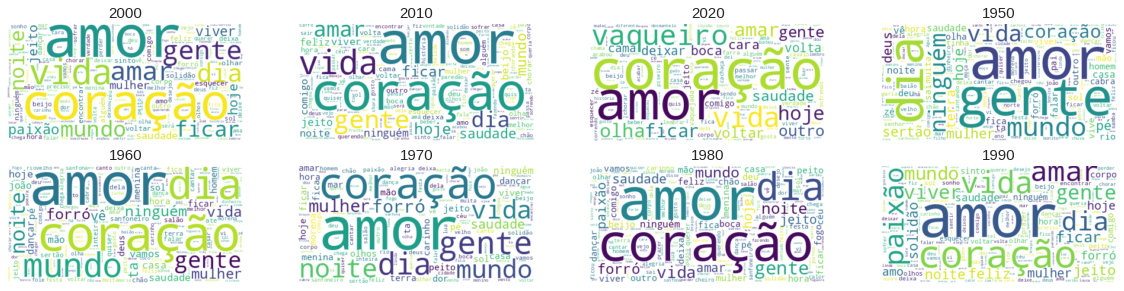

In [7]:
plot_wordcloud(vect_words, 4, 4)

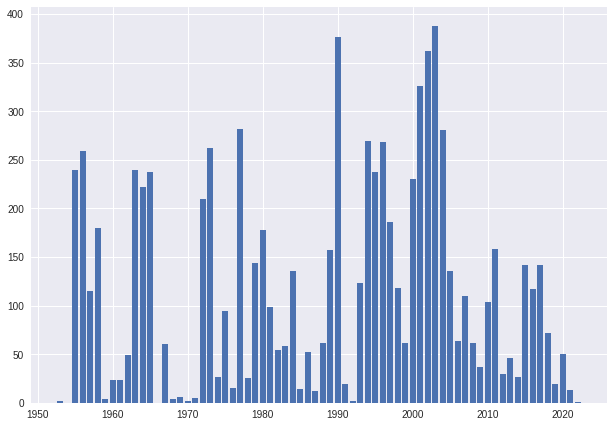

In [9]:
#quantidade de músicas por ano
df_hist = df.groupby(['year'])['title'].count().reset_index().rename(columns={'year': 'year', 'title':'songs'})
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
years = df_hist['year'].to_list()
song_count = df_hist['songs']
ax.bar(years, song_count)
plt.show()

### Cálculo da Riqueza Léxica

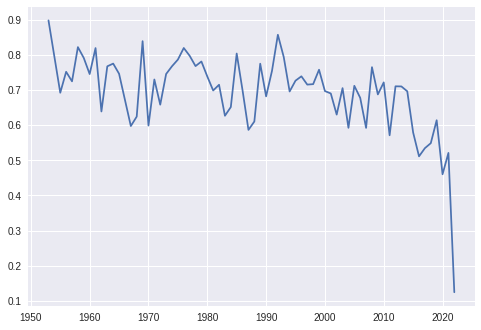

In [27]:
# type-token ratio (TTR) of text - TAXA DO TIPO DE TOKEN.
df['TTR'] = [LexicalRichness(lyric).ttr
 for _, lyric in enumerate(df['clean_lyric'])]

df_ttr = df.groupby(['year'])['TTR'].mean().reset_index()

x1 = df_ttr['year'].to_list()
y1 = df_ttr['TTR'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

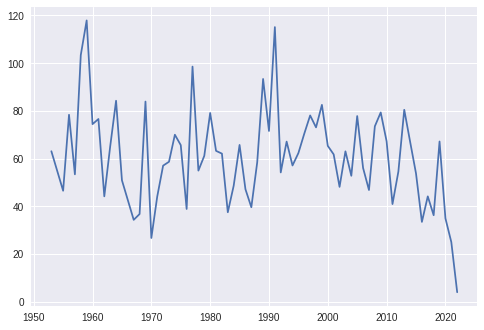

In [11]:
# Return Measure of Textual Lexical Diversity (MTLD) - MEDIDA DE RETORNO DA DIVERDADE LEXICAL DO TEXTO.
df['MTLD'] = [LexicalRichness(lyric).mtld(threshold=0.72)
 for _, lyric in enumerate(df['clean_lyric'])]

df_ttr = df.groupby(['year'])['MTLD'].mean().reset_index()

x1 = df_ttr['year'].to_list()
y1 = df_ttr['MTLD'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

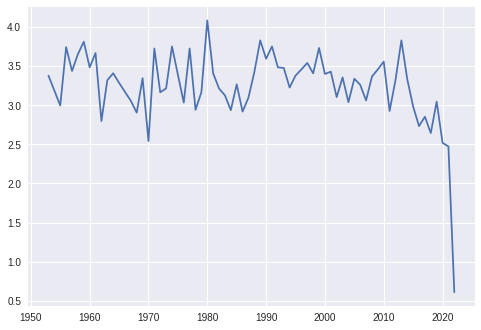

In [29]:
# Return corrected type-token ratio (CTTR) of text - PROPORÇÃO CORRIGIDA DO TIPO DE TOKEN.
df['CTTR'] = [LexicalRichness(lyric).cttr
 for _, lyric in enumerate(df['clean_lyric'])]

df_ttr = df.groupby(['year'])['CTTR'].mean().reset_index()

x1 = df_ttr['year'].to_list()
y1 = df_ttr['CTTR'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")